# Convolution 

In [11]:
%matplotlib inline

In [12]:
import cv2
import numpy as np
from imutils.paths import list_images
from skimage.exposure import rescale_intensity
import os
import matplotlib.pyplot as plt

In [119]:
dataset_dir = os.path.join('..', 'datasets', 'dogs-vs-cats')
image_list = list(list_images(dataset_dir))

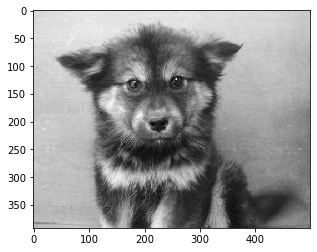

In [258]:
img = cv2.imread(image_list[818])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [272]:
def convolve(image, K):
    height, width = img.shape[:2]
    kernel_height, kernel_width = K.shape[:2]
    padding = (kernel_height - 1) // 2

    img_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)
    output_img = np.zeros((height, width), dtype='float')
    
    for i in np.arange(padding, height + padding):
        for j in np.arange(padding, width + padding):
            roi = img_padded[i - padding:i + padding + 1, j - padding:j + padding + 1]
            k = (roi * K).sum()
            output_img[i - padding, j - padding] = k
    
    output_img = rescale_intensity(output_img, in_range=(0, 255))
    output_img = (output_img * 255).astype('uint8')
    
    return output_img

## Emboss 

In [273]:
emboss = np.array((
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]), dtype='int')

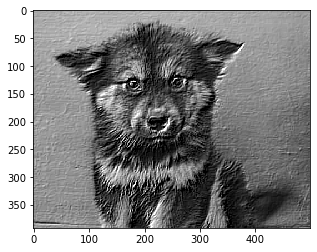

In [274]:
plt.imshow(convolve(img, emboss), cmap='gray')

## Sharpen

In [275]:
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1], 
    [0, -1, 0]), dtype='int')

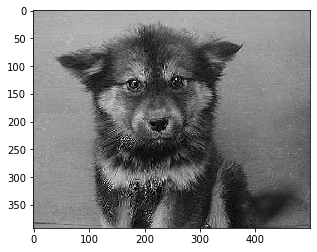

In [276]:
plt.imshow(convolve(img, sharpen), cmap='gray')

## Laplacian

In [279]:
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype='int')

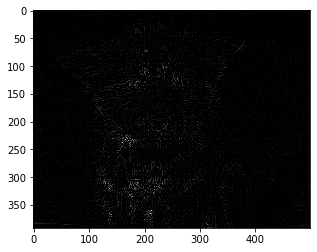

In [280]:
plt.imshow(convolve(img, laplacian), cmap='gray')

## Sobel

In [281]:
sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
), dtype='int')

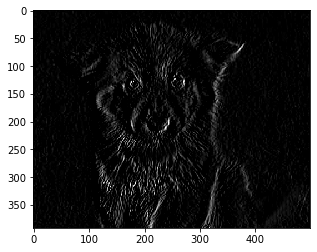

In [282]:
plt.imshow(convolve(img, sobel_x), cmap='gray')

In [284]:
sobel_y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
), dtype='int')

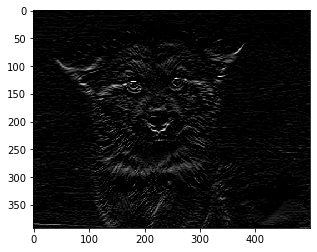

In [285]:
plt.imshow(convolve(img, sobel_y), cmap='gray')

## Blurs 

In [298]:
small_blur = np.ones((7, 7), dtype="float") * (1.0 / (7.0 ** 2))

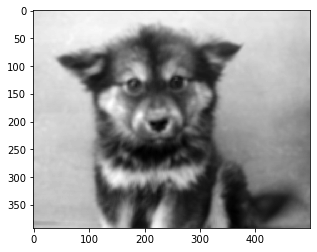

In [295]:
plt.imshow(convolve(img, small_blur), cmap='gray')

In [300]:
large_blur = np.ones((21, 21), dtype="float") * (1.0 / (21.0 ** 2))

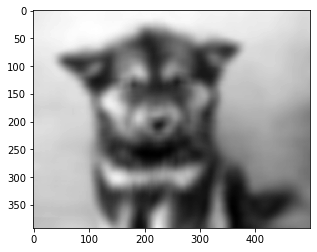

In [301]:
plt.imshow(convolve(img, large_blur), cmap='gray')